In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# reading files

In [2]:
data = pd.read_csv("C:/Users/Kaige Zhang/Desktop/t1.csv")

In [3]:
data.head(5)

Date  Hour  Minute  Sec  GridVoltage  GenerationCurrent  Impedance  \
0  2019-01-08    23      36    2          240                1.3        0.0   
1  2019-01-08    23      44   49          238                1.2        0.0   
2  2019-01-08    23      45   49          238                1.2        0.0   
3  2019-01-08    23      46   49          239                1.2        0.0   
4  2019-01-08    23      47   49          238                1.2        0.0   

   GridCurrent  PowerFactor  GridImportEnergy  GridExportEnergy  \
0          1.3         0.98               0.1               0.0   
1          1.2         0.98               0.1               0.0   
2          1.2         0.98               0.1               0.0   
3          1.2         0.98               0.1               0.0   
4          1.2         0.98               0.1               0.0   

   GenerationImportEnergy  GenerationExportEnergy  Id  
0                     0.1                     0.0  96  
1                     0.1                     0.0  96  
2                     0.1                     0.0  96  
3                     0.1                     0.0  96  
4                     0.1                     0.0  96

In [4]:
data.shape

(6708168, 14)

# group  by date

In [5]:
data = data.drop(['GenerationCurrent'], axis = 1)
data = data.drop(['GenerationImportEnergy'], axis = 1)
data = data.drop(['GenerationExportEnergy'], axis = 1)
data = data.drop(['Impedance'], axis = 1)
data = data.drop(['PowerFactor'], axis = 1)
data = data.drop(['GridExportEnergy'], axis = 1)
data = data.drop(['GridImportEnergy'], axis = 1)
data = data.drop(['GridCurrent'], axis = 1)

In [6]:
data.head(5)

Date  Hour  Minute  Sec  GridVoltage  Id
0  2019-01-08    23      36    2          240  96
1  2019-01-08    23      44   49          238  96
2  2019-01-08    23      45   49          238  96
3  2019-01-08    23      46   49          239  96
4  2019-01-08    23      47   49          238  96

In [7]:
weekday_data1 =  data[data['Date'] >= '2019-02-01']
weekday_data2 = data[data['Date'] <= '2019-02-28']
# 取并集
weekday_data = pd.merge (weekday_data1,weekday_data2,on=['Id', 'Date', 'Hour', 'Minute', 'Sec', 'GridVoltage'])
weekday_data = weekday_data.groupby(['Id','Date','Hour','Minute']).mean()
weekday_data = weekday_data.reset_index()

In [8]:
weekday_data.head()

Id        Date  Hour  Minute   Sec  GridVoltage
0   4  2019-02-01     0       0  24.0        245.0
1   4  2019-02-01     0       1  24.0        245.0
2   4  2019-02-01     0       2  23.0        245.0
3   4  2019-02-01     0       3  24.0        245.0
4   4  2019-02-01     0       4  23.0        245.0

In [9]:
Hour_list = weekday_data['Hour'].drop_duplicates().tolist()
Hour_list = [10,11,12]

In [10]:
date_list = weekday_data['Date'].drop_duplicates().tolist()

In [11]:
id_list = weekday_data['Id'].drop_duplicates().tolist()

In [12]:
# 创建一个新的空的datafram， 分段 10min
ten_minutes = pd.DataFrame(columns = ['Id','Segment', 'GridVoltage'])
ten_minutes.head()


for i in range(len(id_list)):
    segment = 0 
    for d in range(len(date_list)):
        print(i,d)
        tem = weekday_data[weekday_data['Date'] == date_list[d]]
#         print(tem)
        temp = tem[tem['Id'] == id_list[i]]
        for k in range(len(Hour_list)):
            # 找出一个小时的
            temp2 = temp[temp['Hour']== Hour_list[k]]
    #         print(temp2)
            # 每个小时6个10min
            for j in range(6):  
                rows = temp2.loc[(temp2['Minute'] >= j * 10) & (temp2['Minute'] < (j + 1) * 10)]
#                 print(rows)
                avg = rows['GridVoltage'].mean()
        #         print(avg)

                row = {'Id':id_list[i], 'Segment':segment, 'GridVoltage':avg}
                segment += 1
    #             print(row)
                ten_minutes = ten_minutes.append([row], ignore_index=True)
        #         print(ten_minutes)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19


In [17]:
ten_minutes.head()

Id Segment  GridVoltage
0  4       0        241.2
1  4       1        241.3
2  4       2        242.5
3  4       3        243.2
4  4       4        243.0

In [18]:
ten_minutes.shape

(18648, 3)

In [19]:
#  ten_minutes.drop(ten_minutes.columns[len(ten_minutes.columns)-1], axis=1, inplace=True)

In [20]:
# find Na
nan = ten_minutes[ten_minutes.isnull().T.any()]
null_list = nan['Segment'].drop_duplicates().tolist()

In [21]:
tm = ten_minutes

In [22]:
for i in range(len(null_list)):
    ten_minutes = ten_minutes[~ten_minutes['Segment'].isin([null_list[i]])]

In [141]:
ten_minutes.shape

(18241, 3)

In [142]:
col = ['Id']
col += [x for x in range(144)]

data_ten_minutes = pd.DataFrame(columns = col)
for i in range(len(id_list)):
    temp = ten_minutes[ten_minutes['Id'] == id_list[i]]
    vol = temp['GridVoltage'].tolist()
#     vol.insert(0, id_list[i])
#     print(len(vol))
    row = {'Id':id_list[i]}
    for i in range(len(vol)):
        row[i] = vol[i]
#     print(row)
    data_ten_minutes = data_ten_minutes.append([row], ignore_index=True)
    

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [143]:
data_ten_minutes.head()

Id      0      1      2      3      4           5      6           7  \
0   4  243.2  243.0  243.7  244.0  244.3  244.500000  242.4  242.500000   
1   5  244.9  247.4  247.9  247.2  247.2  245.300000  240.6  241.900000   
2   8  239.0  237.9  237.5  239.2  240.6  240.666667  239.2  240.833333   
3  10  233.7  233.2  231.4  232.5  233.8  234.900000  234.5  235.400000   
4  12  231.1  231.7  229.6  230.8  232.2  232.900000  232.5  233.100000   

            8  ...         483         484         485    486    487    488  \
0  241.700000  ...  244.500000  242.333333  241.833333  240.6  243.0  243.4   
1  241.900000  ...  246.388889  244.833333  243.800000  241.6  243.6  244.7   
2  239.444444  ...  243.400000  242.222222  242.100000  240.3  241.9  242.1   
3  235.400000  ...  238.000000  236.100000  235.900000  235.6  238.5  237.8   
4  232.600000  ...  235.800000  233.555556  233.200000  232.1  235.2  234.6   

          489         490         491    492  
0  243.333333  243.666667  242.333333  242.0  
1  246.222222  247.500000  245.666667  244.5  
2  242.000000  242.400000  240.200000  240.6  
3  237.100000  238.200000  235.700000  235.1  
4  234.700000  237.333333  235.100000  235.0  

[5 rows x 494 columns]

In [144]:
tranpose_ten = pd.DataFrame(data_ten_minutes.values.T, index=data_ten_minutes.columns, columns=data_ten_minutes.index)

In [145]:
tranpose_ten = tranpose_ten.drop(labels='Id', axis=0)

In [146]:
tranpose_ten.columns = id_list

In [147]:
tranpose_ten

4        5        8      10       12       15       16       17   \
0      243.2    244.9      239  233.7    231.1      243    244.4    245.8   
1        243    247.4    237.9  233.2    231.7    242.4    247.1    247.5   
2      243.7    247.9    237.5  231.4    229.6      243    247.7    247.7   
3        244    247.2    239.2  232.5    230.8    243.8    246.8    247.2   
4      244.3    247.2    240.6  233.8    232.2    244.1    246.8    247.3   
5      244.5    245.3  240.667  234.9    232.9    244.2    245.6    246.8   
6      242.4    240.6    239.2  234.5    232.5    241.9    239.7    242.2   
7      242.5    241.9  240.833  235.4    233.1    242.4  241.222    242.9   
8      241.7    241.9  239.444  235.4    232.6    241.7    242.3    243.4   
9      242.4    241.8    240.5  237.7      235    242.3    241.9    243.1   
10     242.2    240.8  240.722  237.6    235.1  242.111    241.2    242.6   
11     242.8    241.7      241  238.2    236.1    242.9    241.9  243.111   
12       243    242.9    241.2    233  233.333    243.6    243.2    244.2   
13     243.3  244.222    242.3  232.5    233.1      244    244.4      245   
14       244    245.4    242.7  234.3    234.5    244.3    245.5    246.3   
15     242.1    245.3  239.889  233.6    230.9    242.2    245.1    245.3   
16     242.1    245.9  240.188  233.7    230.9    242.4      246    246.6   
17     242.7    246.2  241.056  232.7    230.3    243.4    246.1    246.5   
18     243.1    245.8  241.875  234.4      232      244      246    246.3   
19     243.4    244.9  241.333  236.1    233.7      244    244.9    245.8   
20     243.9    245.6      242  233.9      233    244.6    245.7    246.1   
21     244.9    244.2  242.125    234    233.6      245    244.7    245.7   
22       245    241.9    243.4  234.3    233.9    245.3    243.1    243.3   
23   244.889    243.4    243.5  236.2    234.2    244.6    244.6      246   
24     240.1      241  239.062  232.6    230.5    240.6    241.4    241.7   
25     242.5    243.5  241.556  235.1    232.7      243  243.889    244.3   
26     242.7    242.6  240.625  237.2    234.4    242.7    243.3    244.4   
27     241.8    241.5  240.278  238.7    235.5    242.7      242      243   
28     241.6    244.1  241.889    239    236.6  242.667    244.3    245.2   
29     242.6    242.6      243    239    236.7    243.5    243.3  244.444   
..       ...      ...      ...    ...      ...      ...      ...      ...   
463    244.2    244.9    243.5  237.6    234.7    245.2    244.5    245.1   
464    242.7    242.5    241.6  236.4    233.8    243.5    242.1    242.8   
465    242.1    242.8    243.2  236.9    234.7      243    242.8    243.3   
466    242.6    243.2    243.2  237.5    235.8    243.2      243    243.5   
467      240    239.7    239.7  234.8    233.7    240.9    238.6    239.8   
468    239.7    241.7    239.7  235.2    233.5    240.2  240.667    241.8   
469    242.1    240.5    242.5  238.5    235.9    242.8    239.7    241.4   
470    242.6    243.2      242  239.5      237      243    241.9    243.7   
471    243.8      245    242.4  239.9    237.8      244    245.1    245.5   
472    243.3    242.9    242.2  240.8      239    243.2    244.3  244.889   
473    242.4    243.9    241.1  236.4  235.667    242.5    244.4    244.8   
474  242.444  245.375  240.667  232.2  232.889  242.889    245.4    245.6   
475    242.7    246.4    240.4  233.5   233.85      243    246.4    246.2   
476      244  245.944    242.5  238.1    235.4    244.8    245.2    245.9   
477      245    245.1    241.9    239    235.6      244    244.9    244.7   
478      243    246.3    240.8  236.3    232.1      243    245.9    246.3   
479    242.4      249  241.111  236.9    233.5      243    248.4    248.2   
480  242.556    246.8      241  237.5    234.9      243    246.8    246.6   
481    242.5  246.667    241.6  238.5    235.9    243.5    246.6    246.7   
482      244    246.9    243.3  237.7    235.2    244.6    247.1    247.1   
483  

In [148]:
tranpose_ten = tranpose_ten.astype(float)
tranpose_ten

4           5           8      10          12          15   \
0    243.200000  244.900000  239.000000  233.7  231.100000  243.000000   
1    243.000000  247.400000  237.900000  233.2  231.700000  242.400000   
2    243.700000  247.900000  237.500000  231.4  229.600000  243.000000   
3    244.000000  247.200000  239.200000  232.5  230.800000  243.800000   
4    244.300000  247.200000  240.600000  233.8  232.200000  244.100000   
5    244.500000  245.300000  240.666667  234.9  232.900000  244.200000   
6    242.400000  240.600000  239.200000  234.5  232.500000  241.900000   
7    242.500000  241.900000  240.833333  235.4  233.100000  242.400000   
8    241.700000  241.900000  239.444444  235.4  232.600000  241.700000   
9    242.400000  241.800000  240.500000  237.7  235.000000  242.300000   
10   242.200000  240.800000  240.722222  237.6  235.100000  242.111111   
11   242.800000  241.700000  241.000000  238.2  236.100000  242.900000   
12   243.000000  242.900000  241.200000  233.0  233.333333  243.600000   
13   243.300000  244.222222  242.300000  232.5  233.100000  244.000000   
14   244.000000  245.400000  242.700000  234.3  234.500000  244.300000   
15   242.100000  245.300000  239.888889  233.6  230.900000  242.200000   
16   242.100000  245.900000  240.187500  233.7  230.900000  242.400000   
17   242.700000  246.200000  241.055556  232.7  230.300000  243.400000   
18   243.100000  245.800000  241.875000  234.4  232.000000  244.000000   
19   243.400000  244.900000  241.333333  236.1  233.700000  244.000000   
20   243.900000  245.600000  242.000000  233.9  233.000000  244.600000   
21   244.900000  244.200000  242.125000  234.0  233.600000  245.000000   
22   245.000000  241.900000  243.400000  234.3  233.900000  245.300000   
23   244.888889  243.400000  243.500000  236.2  234.200000  244.600000   
24   240.100000  241.000000  239.062500  232.6  230.500000  240.600000   
25   242.500000  243.500000  241.555556  235.1  232.700000  243.000000   
26   242.700000  242.600000  240.625000  237.2  234.400000  242.700000   
27   241.800000  241.500000  240.277778  238.7  235.500000  242.700000   
28   241.600000  244.100000  241.888889  239.0  236.600000  242.666667   
29   242.600000  242.600000  243.000000  239.0  236.700000  243.500000   
..          ...         ...         ...    ...         ...         ...   
463  244.200000  244.900000  243.500000  237.6  234.700000  245.200000   
464  242.700000  242.500000  241.600000  236.4  233.800000  243.500000   
465  242.100000  242.800000  243.200000  236.9  234.700000  243.000000   
466  242.600000  243.200000  243.200000  237.5  235.800000  243.200000   
467  240.000000  239.700000  239.700000  234.8  233.700000  240.900000   
468  239.700000  241.700000  239.700000  235.2  233.500000  240.200000   
469  242.100000  240.500000  242.500000  238.5  235.900000  242.800000   
470  242.600000  243.200000  242.000000  239.5  237.000000  243.000000   
471  243.800000  245.000000  242.400000  239.9  237.800000  244.000000   
472  243.300000  242.900000  242.200000  240.8  239.000000  243.200000   
473  242.400000  243.900000  241.100000  236.4  235.666667  242.500000   
474  242.444444  245.375000  240.666667  232.2  232.888889  242.888889   
475  242.700000  246.400000  240.400000  233.5  233.850000  243.000000   
476  244.000000  245.944444  242.500000  238.1  235.400000  244.800000   
477  245.000000  245.100000  241.900000  239.0  235.600000  244.000000   
478  243.000000  246.300000  240.800000  236.3  232.100000  243.000000   
479  242.400000  249.000000  241.111111  236.9  233.500000  243.000000   
480  242.555556  246.800000  241.000000  237.5  234.900000  243.000000   
481  242.500000  246.666667  241.600000  238.5  235.900000  243.500000   
482  244.000000  246.900000  243.300000  237.7  235.200000  244.600000   
483  244.500000  246.388889  243.400000  238.0  235.800000  244.600000   
484  242.333333  244.833333  242.222222  236.1  233.555556  243.000000   
485  241.833333 

In [149]:
ten_corr = tranpose_ten.corr()
ten_corr

4         5         8         10        12        15        16   \
4    1.000000  0.348947  0.519119  0.179477  0.135037  0.923620  0.367803   
5    0.348947  1.000000  0.316642  0.120276  0.197326  0.328299  0.973540   
8    0.519119  0.316642  1.000000  0.542562  0.519389  0.611908  0.319066   
10   0.179477  0.120276  0.542562  1.000000  0.907435  0.198572  0.128149   
12   0.135037  0.197326  0.519389  0.907435  1.000000  0.141957  0.203443   
15   0.923620  0.328299  0.611908  0.198572  0.141957  1.000000  0.340787   
16   0.367803  0.973540  0.319066  0.128149  0.203443  0.340787  1.000000   
17   0.414837  0.937346  0.366128  0.151164  0.201901  0.393612  0.956696   
18   0.963894  0.367873  0.561474  0.176751  0.133863  0.932486  0.379839   
29   0.396686  0.961871  0.349385  0.150094  0.214698  0.371198  0.979025   
31   0.224372  0.187730  0.534756  0.891987  0.834043  0.249361  0.190985   
32   0.152725  0.185719  0.525285  0.874417  0.968149  0.173674  0.191273   
34   0.304952  0.752318  0.239154 -0.071151 -0.004616  0.235203  0.724591   
39   0.731607  0.090286  0.402849  0.038558 -0.002833  0.820112  0.106670   
40   0.966272  0.372633  0.600498  0.224333  0.172758  0.947315  0.384957   
41   0.395528  0.440163  0.015806  0.169994  0.189058  0.458100  0.439610   
43   0.135679  0.192316  0.519055  0.896954  0.989271  0.149082  0.193197   
45   0.354090  0.286108  0.644147  0.871939  0.916802  0.393266  0.289201   
46   0.246764  0.269041  0.567778  0.856393  0.932462  0.278850  0.273248   
47   0.233069  0.161549  0.528976  0.871490  0.801241  0.258494  0.165464   
49   0.328334  0.417444 -0.025131  0.168089  0.195472  0.396706  0.416311   
50   0.881431  0.246300  0.579711  0.182419  0.140409  0.961879  0.265601   
52   0.449101 -0.123749  0.276036  0.059073  0.118446  0.557618 -0.071083   
54   0.427365  0.919126  0.360550  0.144713  0.200041  0.402519  0.938228   
57   0.379529  0.846479  0.278987 -0.060651  0.017316  0.322282  0.810370   
62   0.568718  0.369908  0.970584  0.557124  0.550926  0.648609  0.379056   
64   0.397771  0.860632  0.279577 -0.069966 -0.004697  0.343272  0.821056   
66   0.194865  0.228522  0.518888  0.842879  0.935357  0.205541  0.234696   
70   0.121086  0.181301  0.512386  0.892544  0.989740  0.133382  0.183565   
75   0.129977  0.192887  0.512943  0.890147  0.987661  0.144615  0.193564   
76   0.286466  0.388886 -0.066704  0.139415  0.172157  0.349637  0.389973   
78   0.344295  0.278943  0.652342  0.862720  0.896137  0.389412  0.280589   
85   0.157658  0.201234  0.537899  0.888203  0.979267  0.175958  0.202645   
92   0.382263  0.969773  0.339628  0.145679  0.216682  0.356021  0.986178   
96   0.526644 -0.011958  0.367786  0.181867  0.221446  0.644504  0.026053   
99   0.148660  0.198490  0.522089  0.879717  0.975486  0.162065  0.198341   
100  0.197342  0.167179  0.515852  0.869003  0.813479  0.223278  0.176215   

          17        18        29   ...       66        70        75   \
4    0.414837  0.963894  0.396686  ...  0.194865  0.121086  0.129977   
5    0.937346  0.367873  0.961871  ...  0.228522  0.181301  0.192887   
8    0.366128  0.561474  0.349385  ...  0.518888  0.512386  0.512943   
10   0.151164  0.176751  0.150094  ...  0.842879  0.892544  0.890147   
12   0.201901  0.133863  0.214698  ...  0.935357  0.989740  0.987661   
15   0.393612  0.932486  0.371198  ...  0.205541  0.133382  0.144615   
16   0.956696  0.379839  0.979025  ...  0.234696  0.183565  0.193564   
17   1.000000  0.427453  0.983432  ...  0.230015  0.177256  0.189347   
18   0.427453  1.000000  0.407715  ...  0.193143  0.122406  0.129243   
29   0.983432  0.407715  1.000000  ...  0.242078  0.191780  0.201341   
31   0.215976  0.242028  0.215535  ...  0.783754  0.817012  0.814261   
32   0.188756  0.150592  0.194695  ...  0.951771  0.966362  0.980770   
34   0.744168  0.335040  0.725974  ...  0.024188 -0.034540 -0.012477   
39   0.135172  0.725144  0.112461  ...  0.059066  0.013108  0.018402   
40 

In [150]:
dissimilarity = 1 - np.abs(ten_corr)

In [151]:
dissimilarity

4         5         8         10        12        15        16   \
4    0.000000  0.651053  0.480881  0.820523  0.864963  0.076380  0.632197   
5    0.651053  0.000000  0.683358  0.879724  0.802674  0.671701  0.026460   
8    0.480881  0.683358  0.000000  0.457438  0.480611  0.388092  0.680934   
10   0.820523  0.879724  0.457438  0.000000  0.092565  0.801428  0.871851   
12   0.864963  0.802674  0.480611  0.092565  0.000000  0.858043  0.796557   
15   0.076380  0.671701  0.388092  0.801428  0.858043  0.000000  0.659213   
16   0.632197  0.026460  0.680934  0.871851  0.796557  0.659213  0.000000   
17   0.585163  0.062654  0.633872  0.848836  0.798099  0.606388  0.043304   
18   0.036106  0.632127  0.438526  0.823249  0.866137  0.067514  0.620161   
29   0.603314  0.038129  0.650615  0.849906  0.785302  0.628802  0.020975   
31   0.775628  0.812270  0.465244  0.108013  0.165957  0.750639  0.809015   
32   0.847275  0.814281  0.474715  0.125583  0.031851  0.826326  0.808727   
34   0.695048  0.247682  0.760846  0.928849  0.995384  0.764797  0.275409   
39   0.268393  0.909714  0.597151  0.961442  0.997167  0.179888  0.893330   
40   0.033728  0.627367  0.399502  0.775667  0.827242  0.052685  0.615043   
41   0.604472  0.559837  0.984194  0.830006  0.810942  0.541900  0.560390   
43   0.864321  0.807684  0.480945  0.103046  0.010729  0.850918  0.806803   
45   0.645910  0.713892  0.355853  0.128061  0.083198  0.606734  0.710799   
46   0.753236  0.730959  0.432222  0.143607  0.067538  0.721150  0.726752   
47   0.766931  0.838451  0.471024  0.128510  0.198759  0.741506  0.834536   
49   0.671666  0.582556  0.974869  0.831911  0.804528  0.603294  0.583689   
50   0.118569  0.753700  0.420289  0.817581  0.859591  0.038121  0.734399   
52   0.550899  0.876251  0.723964  0.940927  0.881554  0.442382  0.928917   
54   0.572635  0.080874  0.639450  0.855287  0.799959  0.597481  0.061772   
57   0.620471  0.153521  0.721013  0.939349  0.982684  0.677718  0.189630   
62   0.431282  0.630092  0.029416  0.442876  0.449074  0.351391  0.620944   
64   0.602229  0.139368  0.720423  0.930034  0.995303  0.656728  0.178944   
66   0.805135  0.771478  0.481112  0.157121  0.064643  0.794459  0.765304   
70   0.878914  0.818699  0.487614  0.107456  0.010260  0.866618  0.816435   
75   0.870023  0.807113  0.487057  0.109853  0.012339  0.855385  0.806436   
76   0.713534  0.611114  0.933296  0.860585  0.827843  0.650363  0.610027   
78   0.655705  0.721057  0.347658  0.137280  0.103863  0.610588  0.719411   
85   0.842342  0.798766  0.462101  0.111797  0.020733  0.824042  0.797355   
92   0.617737  0.030227  0.660372  0.854321  0.783318  0.643979  0.013822   
96   0.473356  0.988042  0.632214  0.818133  0.778554  0.355496  0.973947   
99   0.851340  0.801510  0.477911  0.120283  0.024514  0.837935  0.801659   
100  0.802658  0.832821  0.484148  0.130997  0.186521  0.776722  0.823785   

          17        18        29   ...       66        70        75   \
4    0.585163  0.036106  0.603314  ...  0.805135  0.878914  0.870023   
5    0.062654  0.632127  0.038129  ...  0.771478  0.818699  0.807113   
8    0.633872  0.438526  0.650615  ...  0.481112  0.487614  0.487057   
10   0.848836  0.823249  0.849906  ...  0.157121  0.107456  0.109853   
12   0.798099  0.866137  0.785302  ...  0.064643  0.010260  0.012339   
15   0.606388  0.067514  0.628802  ...  0.794459  0.866618  0.855385   
16   0.043304  0.620161  0.020975  ...  0.765304  0.816435  0.806436   
17   0.000000  0.572547  0.016568  ...  0.769985  0.822744  0.810653   
18   0.572547  0.000000  0.592285  ...  0.806857  0.877594  0.870757   
29   0.016568  0.592285  0.000000  ...  0.757922  0.808220  0.798659   
31   0.784024  0.757972  0.784465  ...  0.216246  0.182988  0.185739   
32   0.811244  0.849408  0.805305  ...  0.048229  0.033638  0.019230   
34   0.255832  0.664960  0.274026  ...  0.975812  0.965460  0.987523   
39   0.864828  0.274856  0.887539  ...  0.940934  0.986892  0.981598   
40 

In [152]:
import seaborn as sns

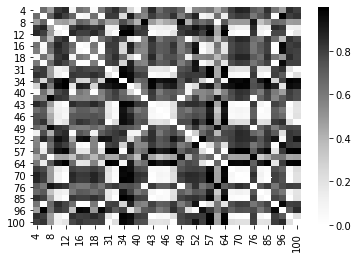

In [153]:
# plot heatmap
ax = sns.heatmap(dissimilarity.T, cmap="Greys")


# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('seabornPandas.png', dpi=1000)
plt.show()

# kmeans

In [157]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


In [158]:
clinski_harabaz_scores = []
cluster_num = range(2, 10)

for i in cluster_num:
    kmeans = KMeans(n_clusters = i, n_jobs = 4)
    predict = kmeans.fit_predict(dissimilarity)
    clinski_harabaz_scores.append(metrics.calinski_harabasz_score(dissimilarity, predict))

In [159]:
clinski_harabaz_scores

[64.7332219042778,
 82.20211072379837,
 92.71994653526203,
 117.07050407465245,
 148.89105172879067,
 188.18195729166044,
 227.17098995286972,
 286.37940240873155]

In [160]:
kmeans = KMeans(n_clusters = 3, n_jobs = 4)
labels_kmeans = kmeans.fit_predict(dissimilarity)

In [161]:
labels_kmeans

array([2, 1, 2, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2,
       2, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0])

In [162]:
data_ten_minutes['labels_kmeans'] = labels_kmeans

# mean shift

In [163]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [164]:
meanShift = MeanShift(bandwidth=1.86)
labels_mean = meanShift.fit_predict(dissimilarity)

In [165]:
labels_mean

array([1, 2, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0], dtype=int64)

In [166]:
data_ten_minutes['labels_meanshift'] = labels_mean

# DBSCAN

In [246]:
from sklearn.cluster import DBSCAN

In [247]:
labels_dbscan = DBSCAN(eps = 0.36).fit_predict(dissimilarity)

In [248]:
labels_dbscan

array([-1,  0, -1, -1,  1, -1,  0,  0, -1,  0, -1,  1, -1, -1, -1, -1,  1,
       -1,  1, -1, -1, -1, -1,  0, -1, -1, -1,  1,  1,  1, -1, -1,  1,  0,
       -1,  1, -1], dtype=int64)

In [249]:
data_ten_minutes['labels_dbscan'] = labels_dbscan + 1

# Gaussian 

In [250]:
from sklearn import mixture

In [251]:
labels_gaussian = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(dissimilarity).predict(dissimilarity)

In [252]:
labels_gaussian

array([1, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1,
       1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0], dtype=int64)

In [253]:
data_ten_minutes['labels_gaussian'] = labels_gaussian

### 删除id 8 和34， 这两个id无原始label

In [254]:
labels =  [2,1,0,2,2,1,1,2,0,0,0,2,2,1,0,0,0,0,2,2,2,1,1,0,1,0,0,0,1,0,0,1,2,0,0]
 # 删除id = 8 id = 34 因为没有这两个id的label
data_ten_minutes =  data_ten_minutes.drop(labels=2, axis=0)
data_ten_minutes = data_ten_minutes.drop(labels=12, axis=0)

data_ten_minutes['labels'] = labels
data_ten_minutes

Id      0           1           2           3           4           5  \
0     4  243.2  243.000000  243.700000  244.000000  244.300000  244.500000   
1     5  244.9  247.400000  247.900000  247.200000  247.200000  245.300000   
3    10  233.7  233.200000  231.400000  232.500000  233.800000  234.900000   
4    12  231.1  231.700000  229.600000  230.800000  232.200000  232.900000   
5    15  243.0  242.400000  243.000000  243.800000  244.100000  244.200000   
6    16  244.4  247.100000  247.700000  246.800000  246.800000  245.600000   
7    17  245.8  247.500000  247.700000  247.200000  247.300000  246.800000   
8    18  243.0  243.000000  243.100000  243.900000  244.100000  244.300000   
9    29  245.4  247.400000  247.700000  246.900000  247.100000  246.200000   
10   31  233.8  234.100000  232.200000  231.900000  234.800000  235.700000   
11   32  230.6  231.000000  230.600000  231.800000  233.300000  233.400000   
13   39  241.3  239.200000  241.000000  241.800000  242.200000  242.500000   
14   40  243.1  243.000000  243.200000  244.000000  244.300000  244.500000   
15   41  246.8  246.300000  246.700000  245.600000  244.200000  243.400000   
16   43  231.0  231.200000  229.800000  231.300000  232.500000  232.700000   
17   45  235.9  235.600000  235.000000  235.900000  236.700000  237.000000   
18   46  234.1  234.100000  233.500000  234.200000  234.400000  235.100000   
19   47  234.1  233.400000  231.000000  229.100000  234.700000  235.000000   
20   49  246.7  246.200000  246.500000  244.700000  242.700000  242.000000   
21   50  242.4  241.600000  242.200000  243.000000  243.500000  243.900000   
22   52  235.1  231.600000  232.100000  234.900000  235.600000  237.700000   
23   54  245.8  247.600000  247.700000  247.200000  247.300000  246.700000   
24   57  247.3  250.100000  249.900000  248.900000  248.800000  247.000000   
25   62  239.6  238.300000  238.600000  239.700000  241.100000  240.800000   
26   64  247.7  250.200000  250.111111  249.300000  249.100000  247.500000   
27   66  233.2  233.400000  232.700000  233.600000  234.600000  234.900000   
28   70  230.5  230.928571  228.555556  229.750000  231.285714  231.642857   
29   75  230.5  231.200000  229.700000  230.800000  232.200000  232.800000   
30   76  246.1  245.500000  246.300000  244.300000  241.400000  240.600000   
31   78  235.3  235.300000  234.700000  235.600000  236.400000  236.700000   
32   85  231.8  232.000000  230.600000  232.100000  233.300000  233.800000   
33   92  244.8  247.200000  247.700000  246.700000  247.000000  245.900000   
34   96  237.4  234.200000  235.800000  237.333333  237.800000  239.200000   
35   99  231.1  231.800000  230.600000  231.600000  233.000000  233.500000   
36  100  234.4  233.800000  232.100000  231.400000  235.000000  235.500000   

             6           7           8  ...         489         490  \
0   242.400000  242.500000  241.700000  ...  243.333333  243.666667   
1   240.600000  241.900000  241.900000  ...  246.222222  247.500000   
3   234.500000  235.400000  235.400000  ...  237.100000  238.200000   
4   232.500000  233.100000  232.600000  ...  234.700000  237.333333   
5   241.900000  242.400000  241.700000  ...  244.666667  244.800000   
6   239.700000  241.222222  242.300000  ...  245.900000  246.900000   
7   242.200000  242.900000  243.400000  ...  246.333333  247.100000   
8   242.111111  242.300000  242.000000  ...  243.600000  244.100000   
9   241.300000  242.400000  242.700000  ...  246.000000  247.000000   
10  235.100000  235.400000  234.700000  ...  235.400000  236.300000   
11  233.000000  232.888889  232.700000  ...  236.562500  238.400000   
13  239.500000  240.800000  239.500000  ...  244.777778  244.000000   
14  242.100000  242.400000  242.000000  ...  243.800000  244.300000   
15  240.200000  242.600000  245.100000  ...  247.500000  247.800000   
16  232.400000  232.900000  232.300000  ...  235.944444  237.800000   
17  236.000000  236.200000  235.900000  ...  239.300000  240

# plot 原始图

In [255]:
import matplotlib.pyplot as plt

from collections import OrderedDict

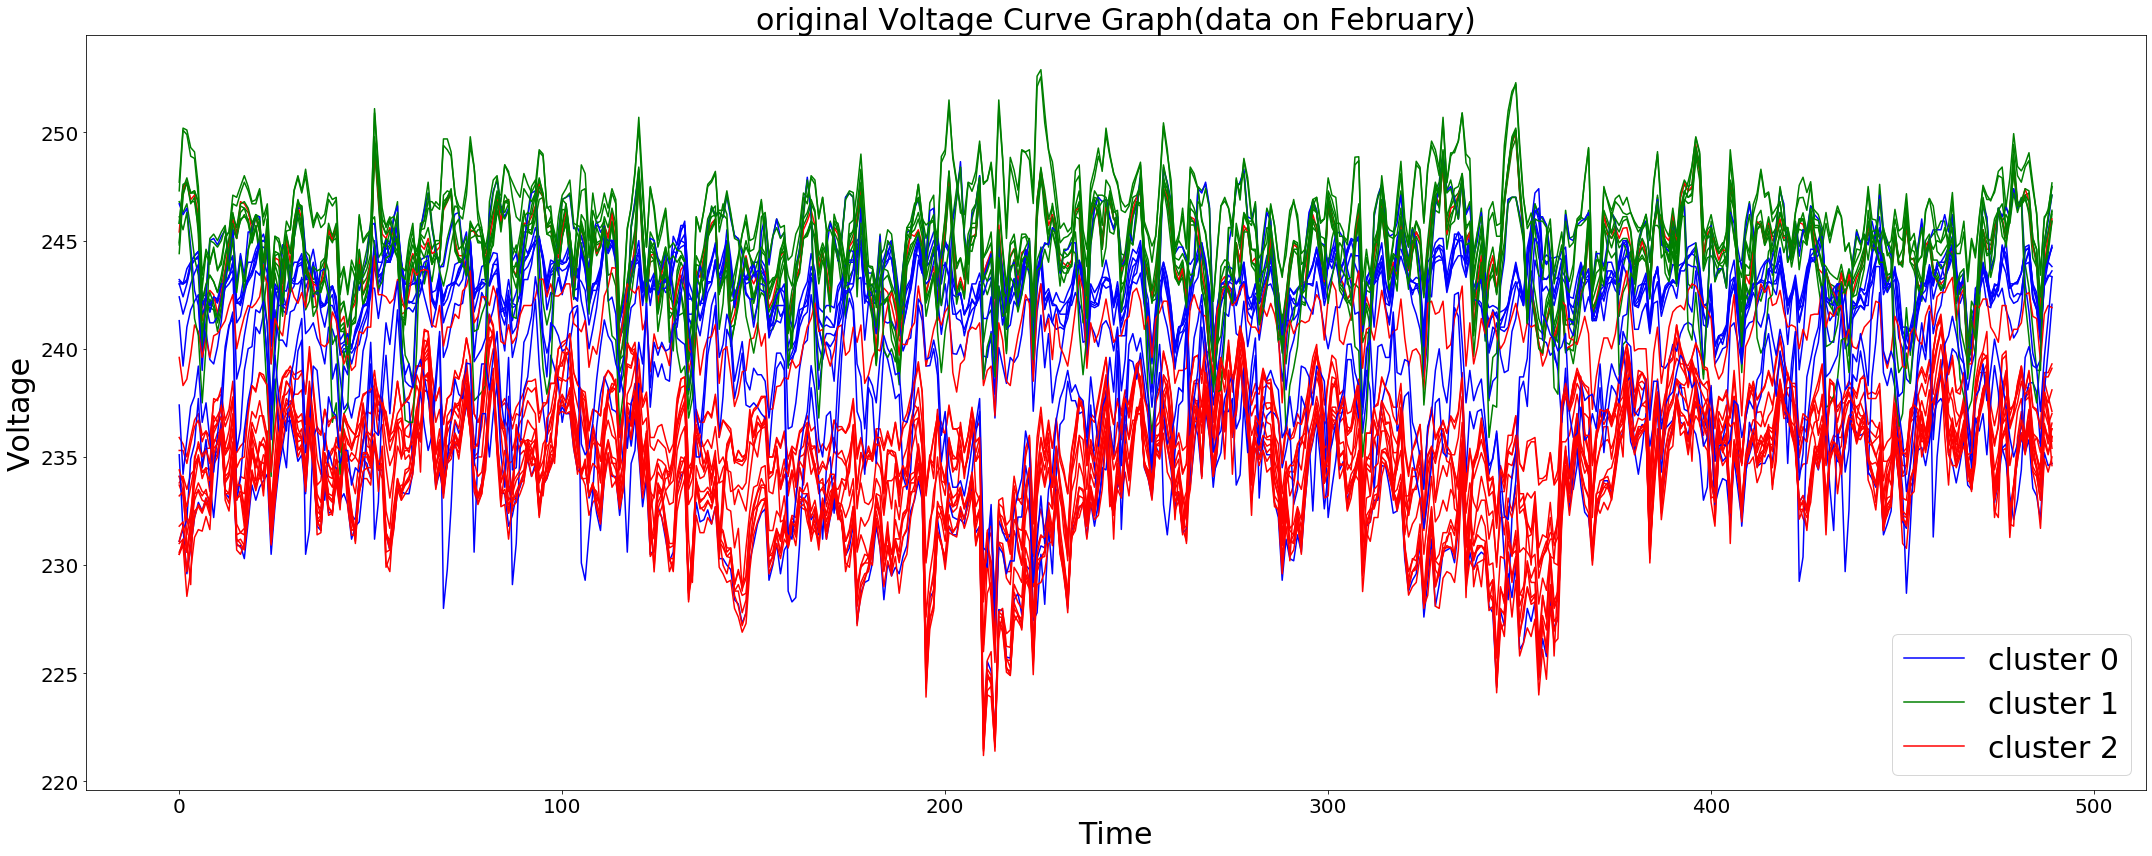

In [269]:
cur_idlist = id_list[:2] + id_list[3:12] + id_list[13:]  # 删除8和34的id list

color_list = ['red','green','blue']
cluster_num = 3
x = range(490)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels'].values[0]
    y =[] 
    for j in range(490):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('original Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot kmeans label

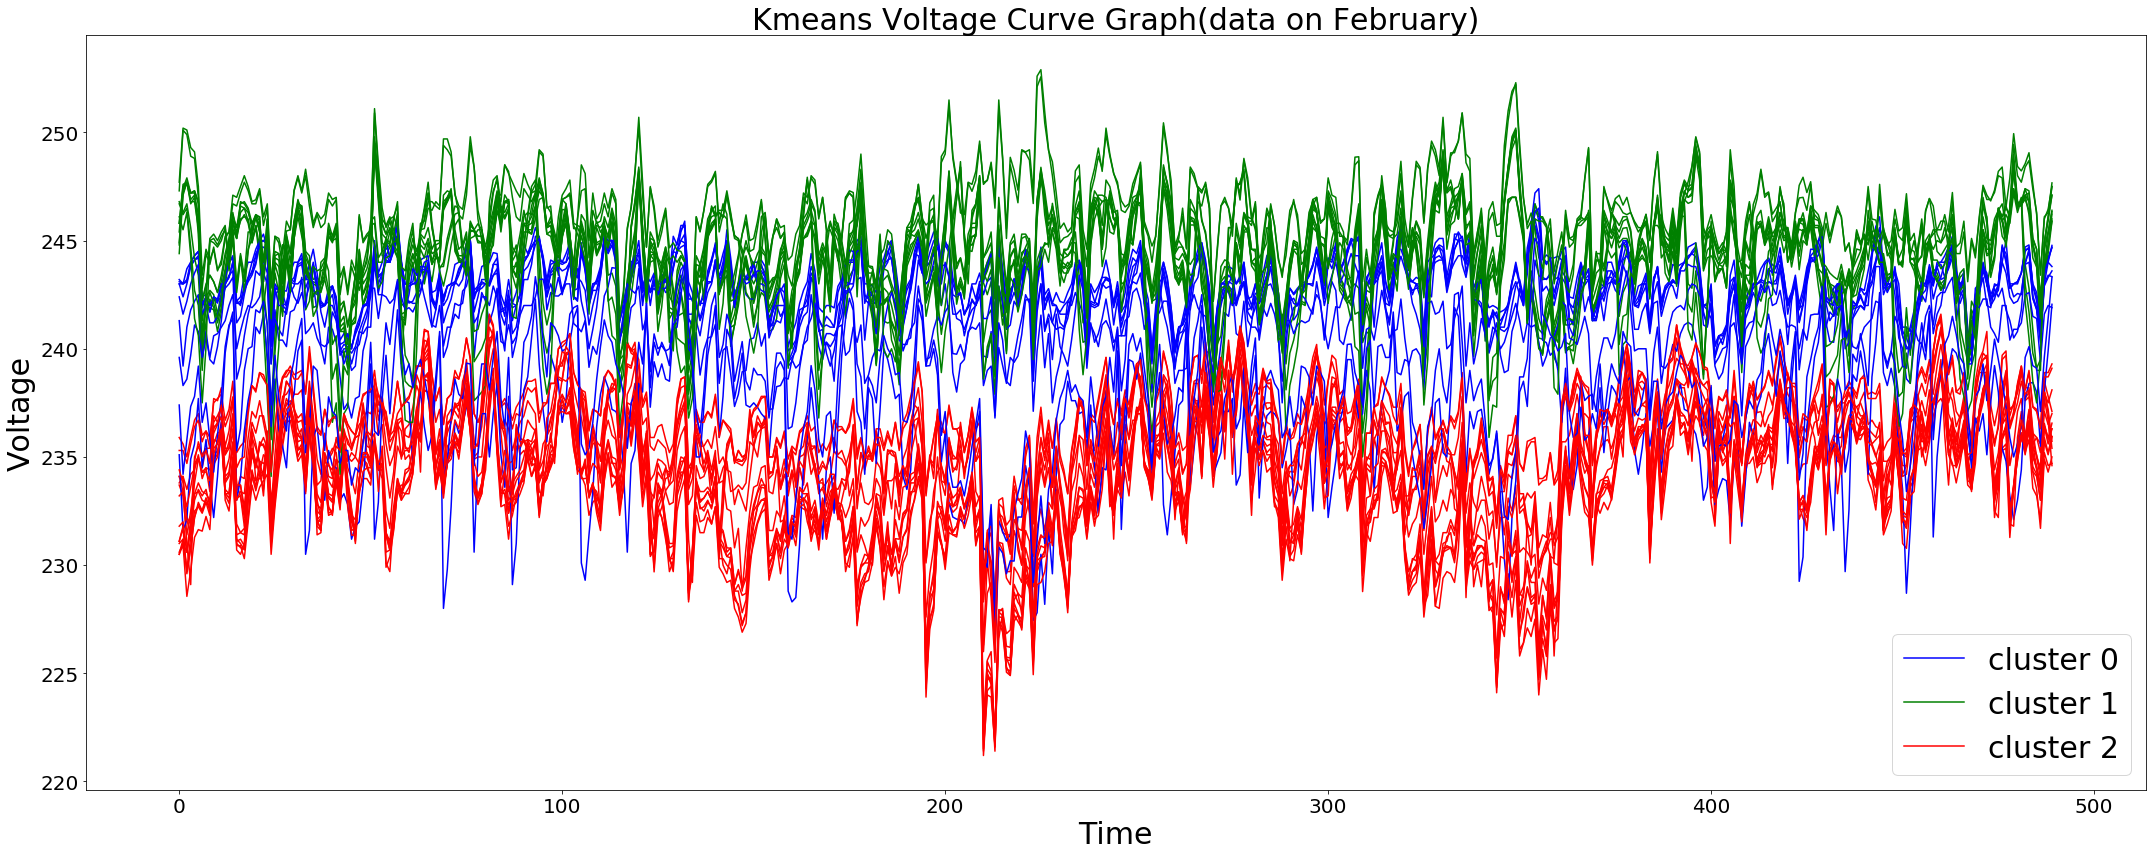

In [270]:
cur_idlist = id_list[:2] + id_list[3:12] + id_list[13:]  # 删除8和34的id list

color_list = ['red','green','blue']
cluster_num = 3
x = range(490)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_kmeans'].values[0]
    y =[] 
    for j in range(490):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('Kmeans Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot meanshift

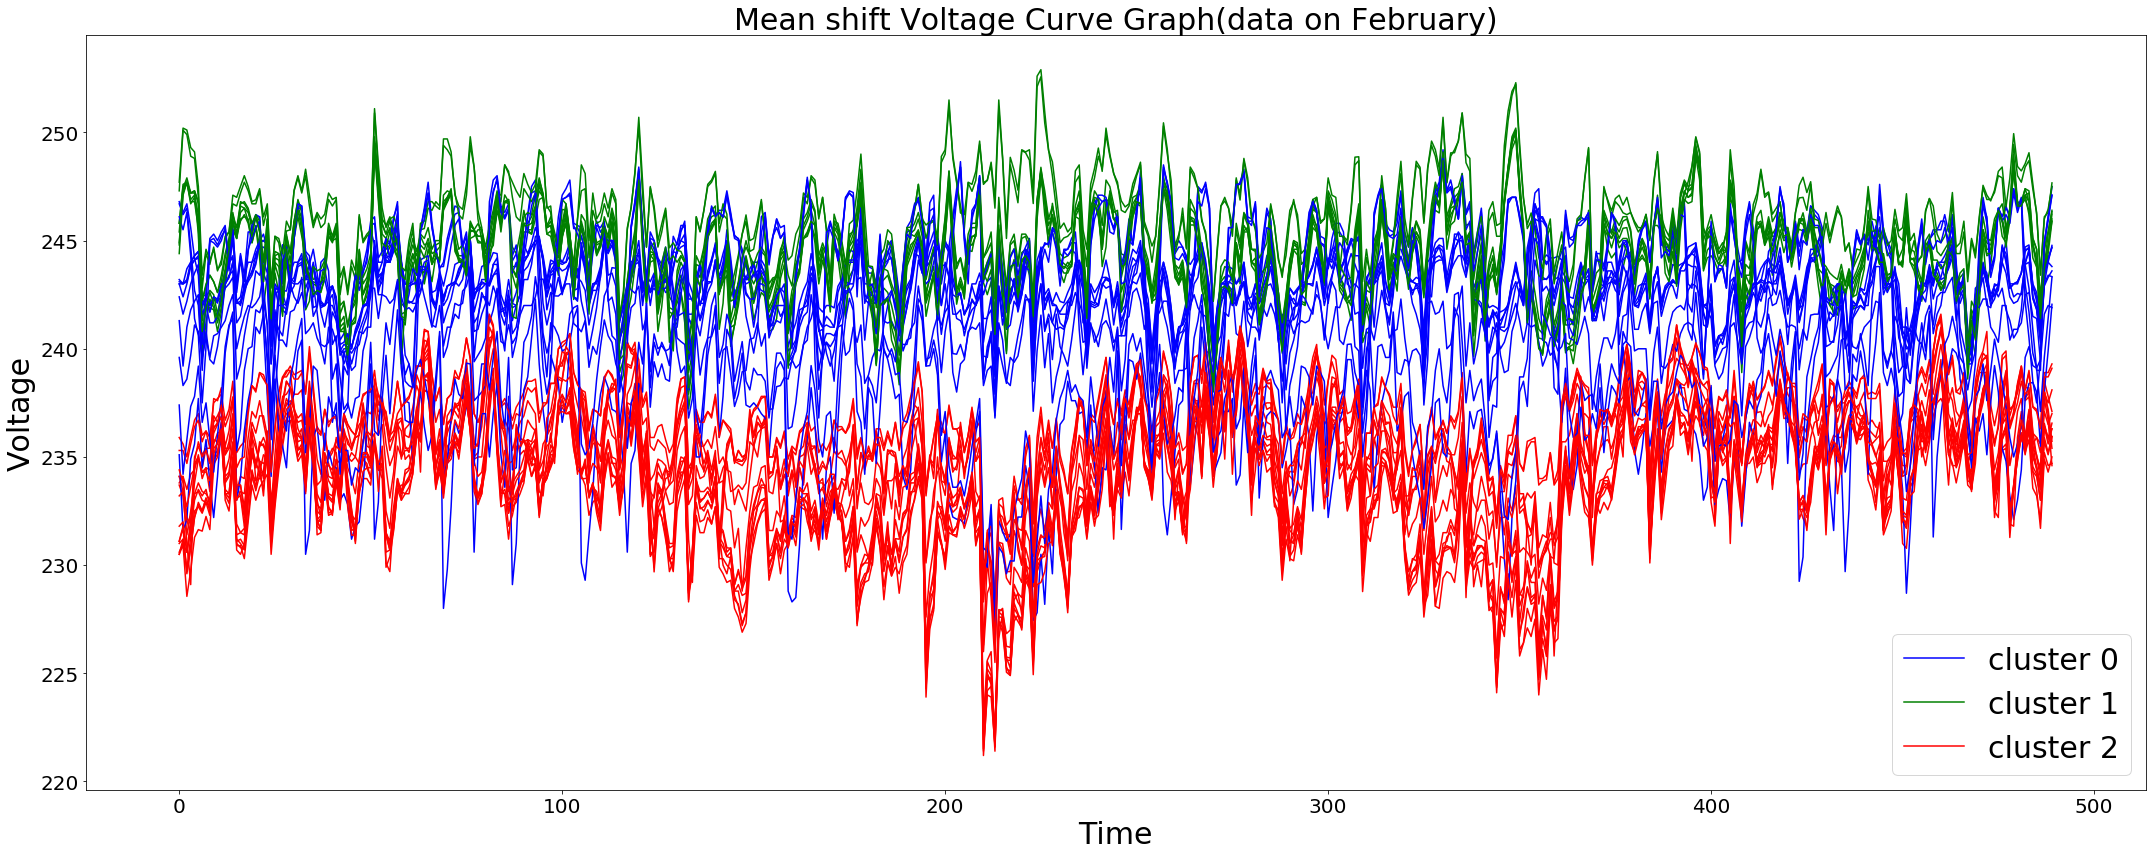

In [271]:
color_list = ['red','blue','green']
cluster_num = 3
x = range(490)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_meanshift'].values[0]
    y =[] 
    for j in range(490):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('Mean shift Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot DBSCAN

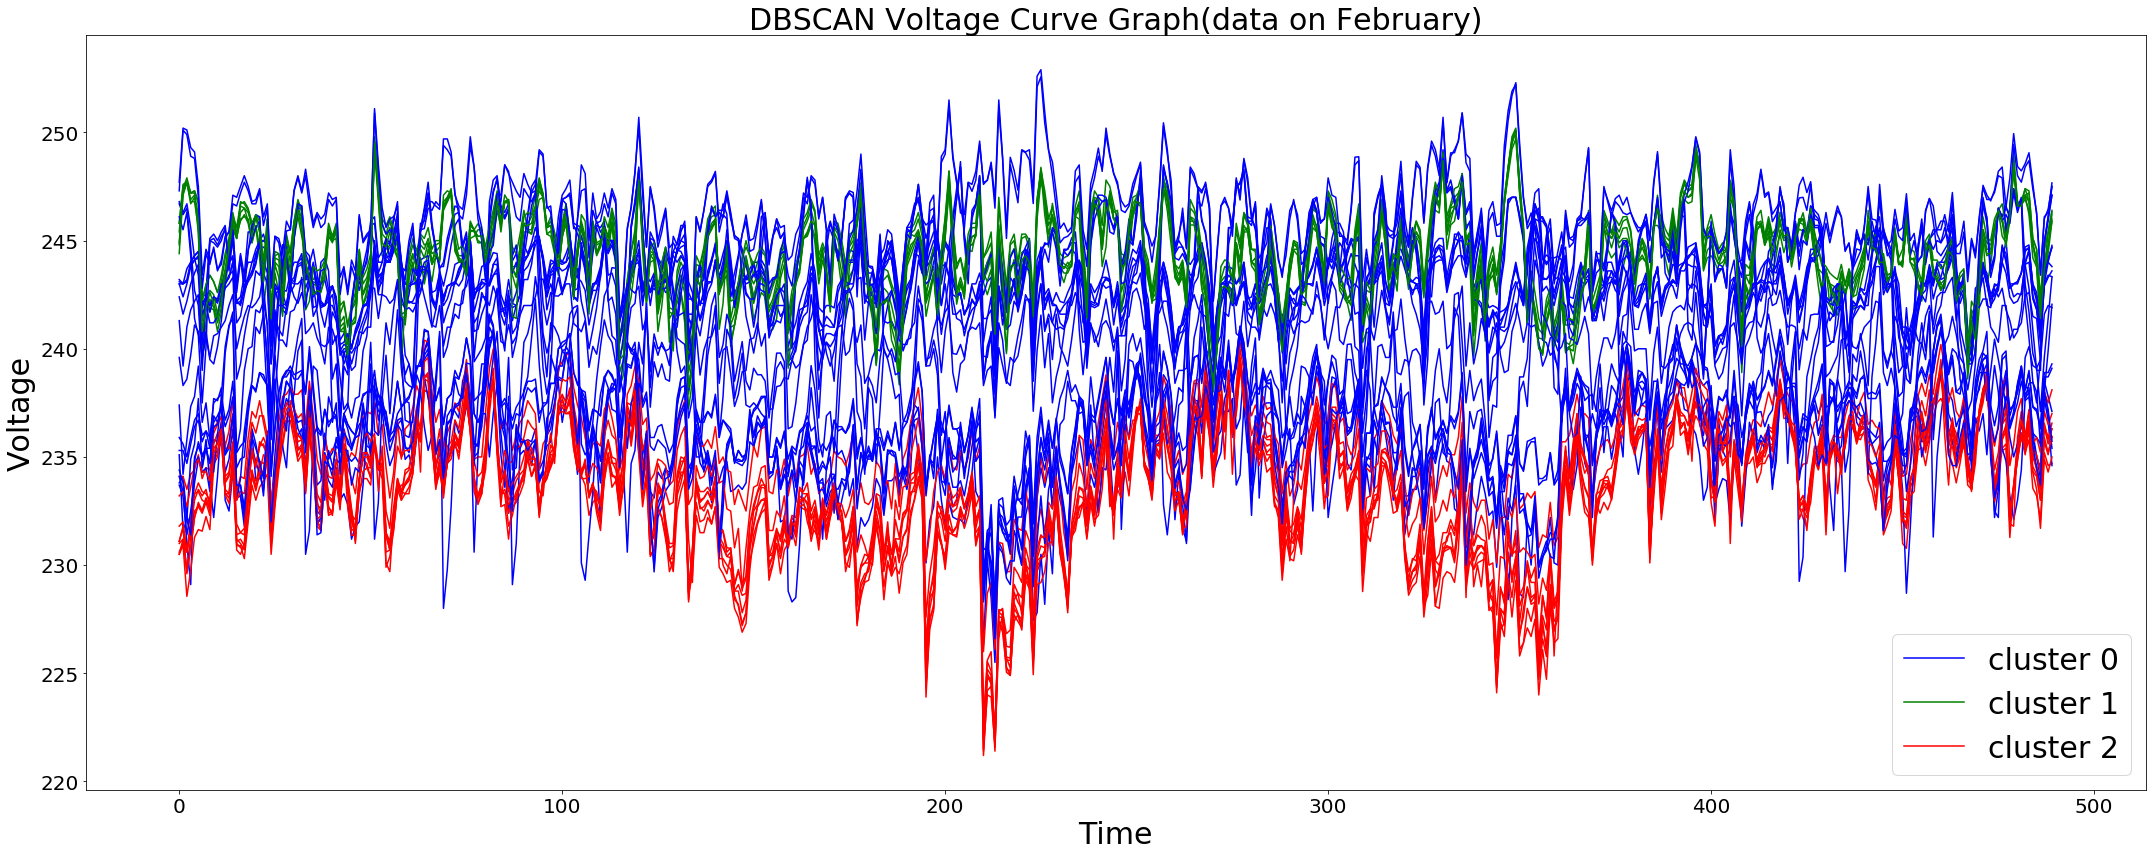

In [272]:
color_list = ['blue','green','red']
cluster_num = 3
x = range(490)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_dbscan'].values[0]
    y =[] 
    for j in range(490):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'lower right',fontsize = 30)

plt.title('DBSCAN Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()



# plot Guassian

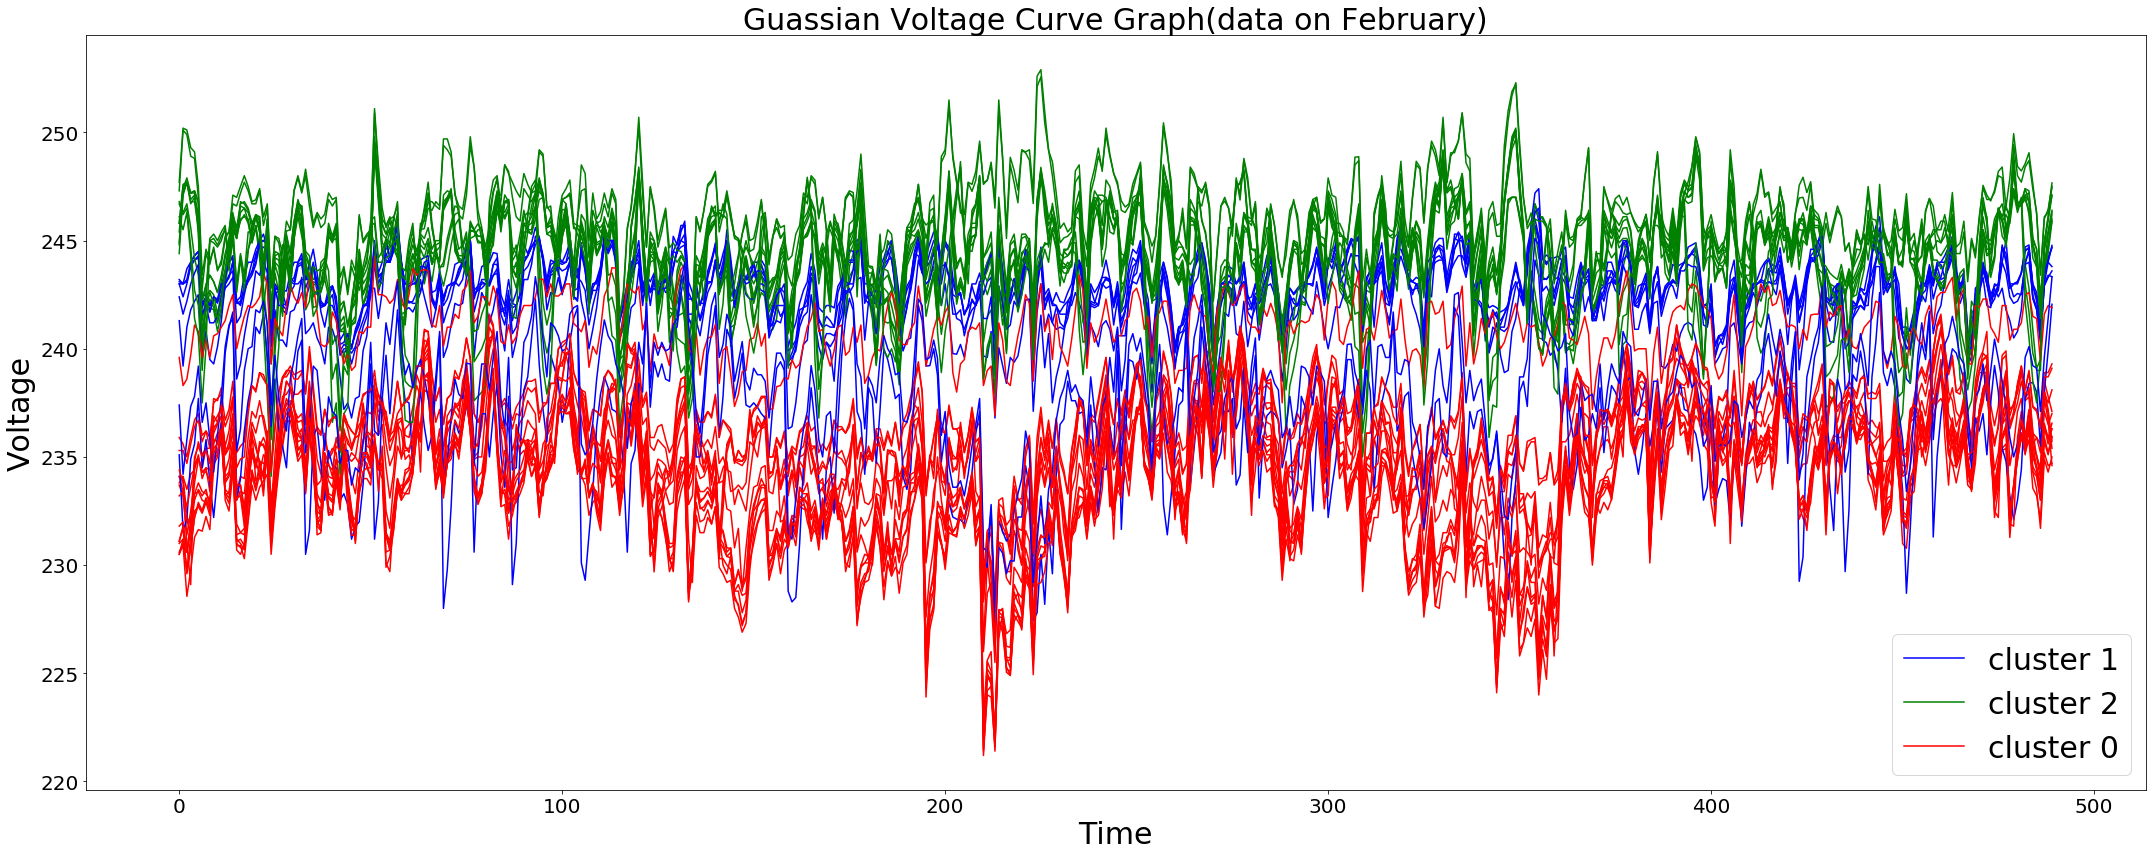

In [273]:
color_list = ['red','blue','green']
cluster_num = 3
x = range(490)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_gaussian'].values[0]
    y =[] 
    for j in range(490):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'lower right',fontsize = 30)

plt.title('Guassian Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()


# Confusion Matrix Kmeans

In [262]:
from sklearn.metrics import confusion_matrix
y_actu = data_ten_minutes['labels']
y_pred = data_ten_minutes['labels_kmeans']
confusion_matrix(y_actu, y_pred)

array([[14,  1,  1],
       [ 0,  9,  0],
       [ 1,  1,  8]], dtype=int64)

In [263]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_kmeans'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted   0  1  2
Actual             
0          14  1  1
1           0  9  0
2           1  1  8

# Confusion Matrix Mean Shift

In [265]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_meanshift'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted   0  1  2
Actual             
0          14  1  1
1           0  2  7
2           1  9  0

# Confusion Matrix DBSCAN

In [266]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_dbscan'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted  0  1  2
Actual            
0          7  1  8
1          4  5  0
2          9  0  1

# Confusion Matrix Gaussian

In [267]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_gaussian'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted   0  1  2
Actual             
0          15  0  1
1           0  0  9
2           1  8  1